# A Model of Narrative Diffusion

This notebook offers and analysis of results from the proposed narrative diffusion model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Load data
data = pd.read_csv("../data/new_model_large_k_20231012140652/results.csv")
data

,agent,timestep,story_item,adopted,prob,Narrative,Social,Trial
0,0,0,0,False,0.507499,0.507499,0.099668,0
1,0,0,1,False,NaN,NaN,NaN,0
2,0,0,2,True,0.510832,0.510832,0.099668,0
3,0,0,3,False,0.539915,0.539915,0.099668,0
4,0,0,4,False,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
220495,49,7,5,True,NaN,NaN,NaN,49
220496,49,7,6,True,NaN,NaN,NaN,49
220497,49,7,7,True,NaN,NaN,NaN,49
220498,49,7,8,True,NaN,NaN,NaN,49


In [19]:
num_agents = len(data.agent.unique())
num_story_items = len(data.story_item.unique())

In [20]:
speed = data.groupby(["timestep","story_item"]).adopted.mean().reset_index()
speed 


,timestep,story_item,adopted
0,0,0,0.4024
1,0,1,0.4180
2,0,2,0.4400
3,0,3,0.4136
4,0,4,0.4032
...,...,...,...
115,11,5,1.0000
116,11,6,1.0000
117,11,7,1.0000
118,11,8,1.0000


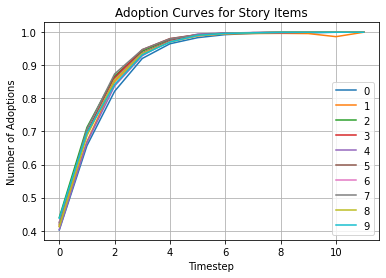

In [21]:
import matplotlib.pyplot as plt
for name, group in speed.groupby('story_item'):
    plt.plot(group['timestep'], group['adopted'], label=name)

plt.legend()
plt.title('Adoption Curves for Story Items')
plt.xlabel('Timestep')
plt.ylabel('Number of Adoptions')
plt.grid(True)
plt.show()

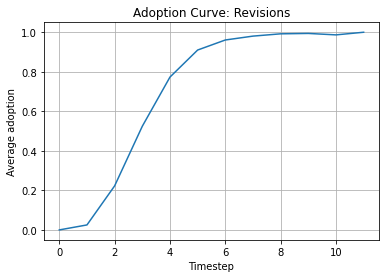

In [22]:
def plot_adoption_speed_overall(data,title="Revisions"):
    item_count = len(data.story_item.unique())
    summary = data.groupby(["Trial","agent","timestep"])['adopted'].sum().reset_index()
    summary["fully_adopted"] = summary.adopted == item_count
    summary = summary.groupby(["Trial","timestep"])['fully_adopted'].mean().reset_index()
    summary = summary.groupby('timestep')['fully_adopted'].mean().reset_index()
    plt.plot(summary['timestep'],summary['fully_adopted'])
    
    plt.title(f'Adoption Curve: {title}')
    plt.xlabel('Timestep')
    plt.ylabel('Average adoption')
    plt.grid(True)
    plt.show()
    
plot_adoption_speed_overall(data)




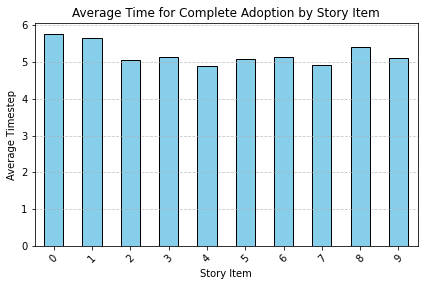

In [23]:


def plot_adoption_speed_items(data):
    num_agents = len(data.agent.unique())
    trials = data.groupby(['Trial','timestep','story_item']).adopted.sum().reset_index()

    completely_adopted = trials[trials['adopted'] ==num_agents]

    # Group by `story_item` and `Trial`, then get the first occurrence for each combination
    first_adoption = completely_adopted.groupby(['story_item', 'Trial']).first().reset_index()

    # Group by `story_item` and compute the mean timestep for each story item
    mx_avg_time_for_adoption = first_adoption.groupby('story_item')['timestep'].mean()

    mx_avg_time_for_adoption.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Average Time for Complete Adoption by Story Item')
    plt.xlabel('Story Item')
    plt.ylabel('Average Timestep')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show() 

plot_adoption_speed_items(data)

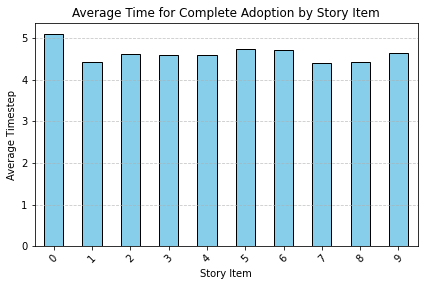

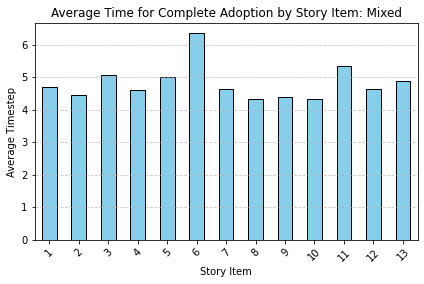

In [ ]:
data = pd.read_csv("./mixed_condition_20230801140922/results.csv")
trials = data.groupby(['Trial','timestep','story_item']).adopted.sum().reset_index()

completely_adopted = trials[trials['adopted'] ==30]

# Group by `story_item` and `Trial`, then get the first occurrence for each combination
first_adoption = completely_adopted.groupby(['story_item', 'Trial']).first().reset_index()

# Group by `story_item` and compute the mean timestep for each story item
mx_avg_time_for_adoption = first_adoption.groupby('story_item')['timestep'].mean()

mx_avg_time_for_adoption.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Time for Complete Adoption by Story Item: Mixed')
plt.xlabel('Story Item')
plt.ylabel('Average Timestep')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


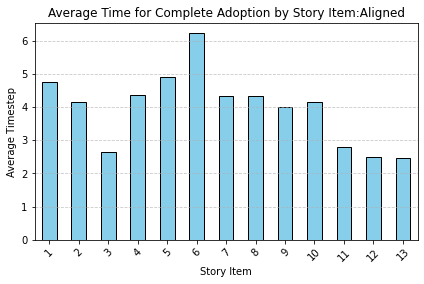

In [20]:
plot_adoption_speed_items("../data/aligned_condition_20230801141242/results.csv",title="Aligned")

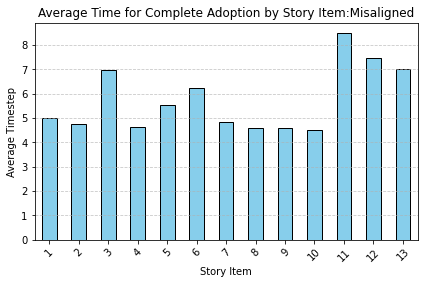

In [21]:
plot_adoption_speed_items("../data//misaligned_condition_20230801141608/results.csv",title="Misaligned")

In [ ]:
al_avg_time_for_adoption

story_item
1     4.75
2     4.17
3     2.66
4     4.37
5     4.90
6     6.23
7     4.35
8     4.35
9     4.02
10    4.15
11    2.80
12    2.50
13    2.48
Name: timestep, dtype: float64

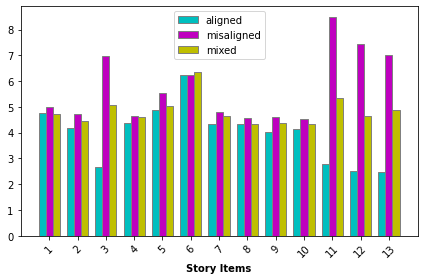

In [ ]:
import numpy as np
# Set the width of the bars
barWidth = 0.25

# Set the position of bars on x axis
r1 = np.arange(len(al_avg_time_for_adoption))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, al_avg_time_for_adoption, color='c', width=barWidth, edgecolor='grey', label='aligned')
plt.bar(r2, ma_avg_time_for_adoption, color='m', width=barWidth, edgecolor='grey', label='misaligned')
plt.bar(r3, mx_avg_time_for_adoption, color='y', width=barWidth, edgecolor='grey', label='mixed')

# Label the x-axis
plt.xlabel('Story Items', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(al_avg_time_for_adoption))], al_avg_time_for_adoption.index, rotation=45)

# Create legend & display the plot
plt.legend()
plt.tight_layout()
plt.show()

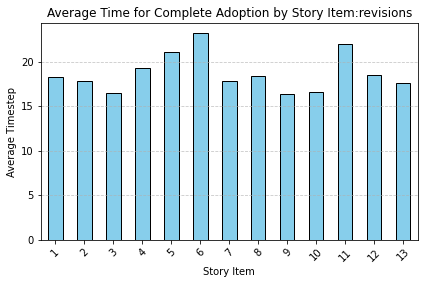

In [22]:
plot_adoption_speed_items("../data/revisions_20230810210134/results.csv",title="revisions")

## Linear Stories

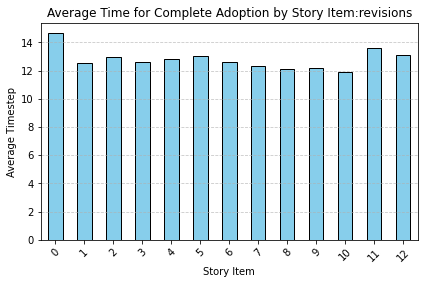

In [33]:
plot_adoption_speed_items("../data/linear_20230811112613/results.csv",title="revisions")

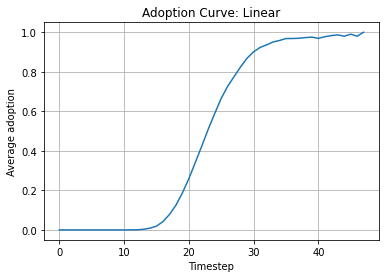

In [34]:
plot_adoption_speed_overall("../data/linear_20230811112613/results.csv",title="Linear",item_count=13)

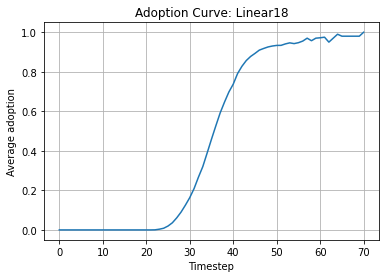

In [35]:
plot_adoption_speed_overall("../data/linear_20230811113144/results.csv",title="Linear18",item_count=18)

## Story Analysis

In [54]:
import networkx as nx
import math 
xi = 5
tau = .5

def narrative_influence(story_item, content_graph):
        """Calculate the narrative influence for a story item."""
        adopted_nodes =list(content_graph.nodes())
        adopted_nodes.remove(story_item)
        distances = [nx.shortest_path_length(content_graph, source=story_item, target=adopted_node) for adopted_node in adopted_nodes]
        W_si = sum([np.exp(-d) for d in distances]) 
        W_prime = 1/(1+math.exp(-xi*(W_si - tau)))
        return W_si


story_graph = nx.read_edgelist("story.edgelist",delimiter = ",")
data = []
for node in story_graph.nodes():
    data.append({"node":node,"influence":narrative_influence(node,story_graph), "degree":story_graph.degree[node]})

narrative_profile = pd.DataFrame(data)
print(narrative_profile)


   node  influence  degree
0     1   2.033540       3
1     3   2.848192       6
2     9   3.049265       7
3    10   2.584176       5
4     2   1.904942       3
5     7   1.916520       3
6     4   1.715447       2
7    13   2.119088       3
8     5   1.181714       2
9     6   0.667273       1
10    8   1.672398       2
11   12   2.137487       4
12   11   1.018882       1


In [62]:
narrative_profile['node'] = narrative_profile.node.astype("int64")
narrative_profile = narrative_profile.sort_values("node")
np.corrcoef(narrative_profile.influence,narrative_profile.degree)

array([[1.        , 0.94757201],
       [0.94757201, 1.        ]])

In [66]:
narrative_profile["speed"] = nn_avg_time_for_adoption.to_list()

In [68]:
narrative_profile['speed'] = max(narrative_profile.speed) - narrative_profile.speed
narrative_profile

,node,influence,degree,speed
0,1,2.033540,3,2.02
4,2,1.904942,3,2.51
1,3,2.848192,6,2.56
6,4,1.715447,2,2.34
8,5,1.181714,2,1.44
9,6,0.667273,1,0.00
5,7,1.916520,3,2.56
10,8,1.672398,2,2.46
2,9,3.049265,7,2.62
3,10,2.584176,5,2.70


In [70]:
np.corrcoef(narrative_profile.degree,narrative_profile.speed)

array([[1.        , 0.57656411],
       [0.57656411, 1.        ]])

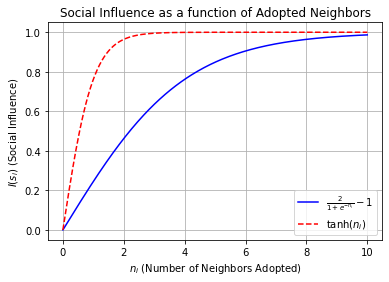

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def I_sigmoid(n):
    return 2 / (1 + np.exp(-.5*n)) - 1

def I_tanh(n):
    return np.tanh(n)

x = np.linspace(0, 10, 400)
y_sigmoid = I_sigmoid(x)
y_tanh = I_tanh(x)

plt.plot(x, y_sigmoid, label=r'$\frac{2}{1 + e^{-n_i}} - 1$', color='blue')
plt.plot(x, y_tanh, label=r'$\tanh(n_i)$', color='red', linestyle='--')
plt.xlabel('$n_i$ (Number of Neighbors Adopted)')
plt.ylabel('$I(s_i)$ (Social Influence)')
plt.title('Social Influence as a function of Adopted Neighbors')
plt.legend()
plt.grid(True)
plt.show()
